In [30]:
import pandas as pd

excel_path = 'Meta analysis HBOT PERFORMANCE.xlsx'  
data = pd.read_excel(excel_path, engine='openpyxl')

print(data.head())


                      Study   n  n_intervention  intervention_pressure  \
0   Mihailovic et al., 2023  12              12                    1.3   
1  Widyanto & Hartono, 2018  20              10                    1.3   
2         Park et al., 2018  10              10                    1.3   
3       Branco et al., 2016  11              11                    2.4   
4       Burgos et al., 2016  12               6                    2.0   

   intervention_duration  intervention_sessions  intervention_Age  \
0                     75                      2              32.0   
1                     15                      1              21.0   
2                     30                      1              21.1   
3                    100                      1              29.7   
4                     30                     15              18.8   

   intervention_Age_sd  intervention_Height  intervention_Height_sd  ...  \
0                11.00                180.9                    4

In [31]:
data.head

<bound method NDFrame.head of                       Study   n  n_intervention  intervention_pressure  \
0   Mihailovic et al., 2023  12              12                    1.3   
1  Widyanto & Hartono, 2018  20              10                    1.3   
2         Park et al., 2018  10              10                    1.3   
3       Branco et al., 2016  11              11                    2.4   
4       Burgos et al., 2016  12               6                    2.0   
5       Zinner et al., 2015  10              10                    1.0   

   intervention_duration  intervention_sessions  intervention_Age  \
0                     75                      2              32.0   
1                     15                      1              21.0   
2                     30                      1              21.1   
3                    100                      1              29.7   
4                     30                     15              18.8   
5                      3             

In [32]:
data.columns  

Index(['Study', 'n', 'n_intervention', 'intervention_pressure',
       'intervention_duration', 'intervention_sessions', 'intervention_Age',
       'intervention_Age_sd', 'intervention_Height', 'intervention_Height_sd',
       'intervention_Weight', 'intervention_Weight_sd', 'intervention_fatmass',
       'intervention_fatmass_sd', 'n_control', 'control_Age', 'control_Age_sd',
       'control_Height', 'control_Height_sd', 'control_Weight',
       'control_Weight_sd', 'control_fatmass', 'control_fatmass_sd',
       'control_baseline_lactate', 'control_baseline_lactate_sd',
       'control_postwork_lactate', 'control_postwork_lactate_sd',
       'control_final_lactate', 'control_final_lactate_sd',
       'HBOT_baseline_lactate', 'HBOT_baseline_lactate_sd',
       'HBOT_postwork_lactate', 'HBOT_postwork_lactate_sd',
       'HBOT_final_lactate', 'HBOT_final_lactate_sd', 'Units'],
      dtype='object')

In [33]:
import numpy as np
from scipy.stats import ttest_rel
from sklearn.impute import SimpleImputer
import pandas as pd

columns_of_interest = [
    'Study', 'n', 'n_intervention',  'intervention_pressure',
       'intervention_duration', 'intervention_sessions','intervention_Age', 'intervention_Age_sd',
    'intervention_Height', 'intervention_Height_sd', 'intervention_Weight', 'intervention_Weight_sd',
    'intervention_fatmass', 'intervention_fatmass_sd', 'n_control', 'control_Age', 'control_Age_sd',
    'control_Height', 'control_Height_sd', 'control_Weight', 'control_Weight_sd', 
    'control_fatmass', 'control_fatmass_sd', 'control_baseline_lactate', 
    'control_baseline_lactate_sd', 'control_postwork_lactate', 'control_postwork_lactate_sd', 
    'control_final_lactate', 'control_final_lactate_sd', 'HBOT_baseline_lactate', 
    'HBOT_baseline_lactate_sd', 'HBOT_postwork_lactate', 'HBOT_postwork_lactate_sd', 
    'HBOT_final_lactate', 'HBOT_final_lactate_sd', 'Units'
]

data = data[columns_of_interest]

imputer = SimpleImputer(strategy='mean')

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

def calculate_mean_difference(row, control_mean, hbot_mean):
    return row[hbot_mean] - row[control_mean]

data['baseline_diff'] = data.apply(lambda row: calculate_mean_difference(row, 'control_baseline_lactate', 'HBOT_baseline_lactate'), axis=1)
data['postwork_diff'] = data.apply(lambda row: calculate_mean_difference(row, 'control_postwork_lactate', 'HBOT_postwork_lactate'), axis=1)
data['final_diff'] = data.apply(lambda row: calculate_mean_difference(row, 'control_final_lactate', 'HBOT_final_lactate'), axis=1)

def calculate_cohen_d(row, control_mean, hbot_mean, control_sd, hbot_sd):
    pooled_sd = np.sqrt((row[control_sd]**2 + row[hbot_sd]**2) / 2)
    return (row[hbot_mean] - row[control_mean]) / pooled_sd

data['cohen_d_baseline'] = data.apply(lambda row: calculate_cohen_d(row, 'control_baseline_lactate', 'HBOT_baseline_lactate', 'control_baseline_lactate_sd', 'HBOT_baseline_lactate_sd'), axis=1)
data['cohen_d_postwork'] = data.apply(lambda row: calculate_cohen_d(row, 'control_postwork_lactate', 'HBOT_postwork_lactate', 'control_postwork_lactate_sd', 'HBOT_postwork_lactate_sd'), axis=1)
data['cohen_d_final'] = data.apply(lambda row: calculate_cohen_d(row, 'control_final_lactate', 'HBOT_final_lactate', 'control_final_lactate_sd', 'HBOT_final_lactate_sd'), axis=1)

print(data[['Study', 'baseline_diff', 'postwork_diff', 'final_diff', 'cohen_d_baseline', 'cohen_d_postwork', 'cohen_d_final']].head())


                      Study  baseline_diff  postwork_diff  final_diff  \
0   Mihailovic et al., 2023         -0.184        -0.1000       -0.70   
1  Widyanto & Hartono, 2018          0.040         0.2600       -2.31   
2         Park et al., 2018         -0.460         0.7700       -2.83   
3       Branco et al., 2016          0.000        -0.0175       -1.70   
4       Burgos et al., 2016         -0.400        -0.0175       -3.50   

   cohen_d_baseline  cohen_d_postwork  cohen_d_final  
0         -0.185669         -0.037769      -0.318182  
1          0.015326          0.099617      -0.885057  
2         -0.485247          0.226085      -1.449007  
3          0.000000         -0.006818      -1.214286  
4         -0.777029         -0.006818      -2.990252  


In [34]:
data.columns 
  

Index(['Study', 'n', 'n_intervention', 'intervention_pressure',
       'intervention_duration', 'intervention_sessions', 'intervention_Age',
       'intervention_Age_sd', 'intervention_Height', 'intervention_Height_sd',
       'intervention_Weight', 'intervention_Weight_sd', 'intervention_fatmass',
       'intervention_fatmass_sd', 'n_control', 'control_Age', 'control_Age_sd',
       'control_Height', 'control_Height_sd', 'control_Weight',
       'control_Weight_sd', 'control_fatmass', 'control_fatmass_sd',
       'control_baseline_lactate', 'control_baseline_lactate_sd',
       'control_postwork_lactate', 'control_postwork_lactate_sd',
       'control_final_lactate', 'control_final_lactate_sd',
       'HBOT_baseline_lactate', 'HBOT_baseline_lactate_sd',
       'HBOT_postwork_lactate', 'HBOT_postwork_lactate_sd',
       'HBOT_final_lactate', 'HBOT_final_lactate_sd', 'Units', 'baseline_diff',
       'postwork_diff', 'final_diff', 'cohen_d_baseline', 'cohen_d_postwork',
       'cohen_d_f

In [35]:
import statsmodels.api as sm
import numpy as np

imputer = SimpleImputer(strategy='mean')

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

def calculate_mean_difference(row, control_mean, hbot_mean):
    return row[hbot_mean] - row[control_mean]

data['baseline_diff'] = data.apply(lambda row: calculate_mean_difference(row, 'control_baseline_lactate', 'HBOT_baseline_lactate'), axis=1)
data['postwork_diff'] = data.apply(lambda row: calculate_mean_difference(row, 'control_postwork_lactate', 'HBOT_postwork_lactate'), axis=1)
data['final_diff'] = data.apply(lambda row: calculate_mean_difference(row, 'control_final_lactate', 'HBOT_final_lactate'), axis=1)

def calculate_cohen_d(row, control_mean, hbot_mean, control_sd, hbot_sd):
    pooled_sd = np.sqrt((row[control_sd]**2 + row[hbot_sd]**2) / 2)
    return (row[hbot_mean] - row[control_mean]) / pooled_sd

data['cohen_d_baseline'] = data.apply(lambda row: calculate_cohen_d(row, 'control_baseline_lactate', 'HBOT_baseline_lactate', 'control_baseline_lactate_sd', 'HBOT_baseline_lactate_sd'), axis=1)
data['cohen_d_postwork'] = data.apply(lambda row: calculate_cohen_d(row, 'control_postwork_lactate', 'HBOT_postwork_lactate', 'control_postwork_lactate_sd', 'HBOT_postwork_lactate_sd'), axis=1)
data['cohen_d_final'] = data.apply(lambda row: calculate_cohen_d(row, 'control_final_lactate', 'HBOT_final_lactate', 'control_final_lactate_sd', 'HBOT_final_lactate_sd'), axis=1)

valid_data = data.dropna(subset=['cohen_d_baseline', 'cohen_d_postwork', 'cohen_d_final'])

def calculate_variance(row, control_sd, hbot_sd):
    return (row[control_sd] ** 2 + row[hbot_sd] ** 2) / 2

valid_data['var_baseline'] = valid_data.apply(lambda row: calculate_variance(row, 'control_baseline_lactate_sd', 'HBOT_baseline_lactate_sd'), axis=1)
valid_data['var_postwork'] = valid_data.apply(lambda row: calculate_variance(row, 'control_postwork_lactate_sd', 'HBOT_postwork_lactate_sd'), axis=1)
valid_data['var_final'] = valid_data.apply(lambda row: calculate_variance(row, 'control_final_lactate_sd', 'HBOT_final_lactate_sd'), axis=1)

effect_sizes_baseline = valid_data['cohen_d_baseline']
variances_baseline = valid_data['var_baseline']
effect_sizes_postwork = valid_data['cohen_d_postwork']
variances_postwork = valid_data['var_postwork']
effect_sizes_final = valid_data['cohen_d_final']
variances_final = valid_data['var_final']

def run_meta_analysis(effect_sizes, variances):
    weights = 1 / variances
    model = sm.WLS(effect_sizes, np.ones_like(effect_sizes), weights=weights)
    results = model.fit()
    return results

baseline_meta = run_meta_analysis(effect_sizes_baseline, variances_baseline)
postwork_meta = run_meta_analysis(effect_sizes_postwork, variances_postwork)
final_meta = run_meta_analysis(effect_sizes_final, variances_final)

baseline_meta_summary = baseline_meta.summary()
postwork_meta_summary = postwork_meta.summary()
final_meta_summary = final_meta.summary()

baseline_meta_summary, postwork_meta_summary, final_meta_summary


c:\Users\SBSBB\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\SBSBB\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\SBSBB\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             WLS Regression Results                            
 Dep. Variable:       cohen_d_baseline   R-squared:                       0.000
 Model:                            WLS   Adj. R-squared:                  0.000
 Method:                 Least Squares   F-statistic:                       nan
 Date:                Tue, 01 Oct 2024   Prob (F-statistic):                nan
 Time:                        21:13:54   Log-Likelihood:                -2.9261
 No. Observations:                   6   AIC:                             7.852
 Df Residuals:                       5   BIC:                             7.644
 Df Model:                           0                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [36]:
median_age = data['intervention_fatmass'].median()

data['age_group'] = data['intervention_fatmass'].apply(lambda x: 'Low fat mass' if x <= median_age else 'High fat mass')

younger_data = data[data['age_group'] == 'Low fat mass']
older_data = data[data['age_group'] == 'High fat mass']

def run_subgroup_meta_analysis(subgroup_data, time_point):
    effect_sizes = subgroup_data[f'cohen_d_{time_point}']
    variances = subgroup_data[f'var_{time_point}']
    return run_meta_analysis(effect_sizes, variances)

younger_data['var_baseline'] = younger_data.apply(lambda row: calculate_variance(row, 'control_baseline_lactate_sd', 'HBOT_baseline_lactate_sd'), axis=1)
younger_data['var_postwork'] = younger_data.apply(lambda row: calculate_variance(row, 'control_postwork_lactate_sd', 'HBOT_postwork_lactate_sd'), axis=1)
younger_data['var_final'] = younger_data.apply(lambda row: calculate_variance(row, 'control_final_lactate_sd', 'HBOT_final_lactate_sd'), axis=1)

older_data['var_baseline'] = older_data.apply(lambda row: calculate_variance(row, 'control_baseline_lactate_sd', 'HBOT_baseline_lactate_sd'), axis=1)
older_data['var_postwork'] = older_data.apply(lambda row: calculate_variance(row, 'control_postwork_lactate_sd', 'HBOT_postwork_lactate_sd'), axis=1)
older_data['var_final'] = older_data.apply(lambda row: calculate_variance(row, 'control_final_lactate_sd', 'HBOT_final_lactate_sd'), axis=1)

younger_baseline_meta = run_subgroup_meta_analysis(younger_data, 'baseline')
younger_postwork_meta = run_subgroup_meta_analysis(younger_data, 'postwork')
younger_final_meta = run_subgroup_meta_analysis(younger_data, 'final')

older_baseline_meta = run_subgroup_meta_analysis(older_data, 'baseline')
older_postwork_meta = run_subgroup_meta_analysis(older_data, 'postwork')
older_final_meta = run_subgroup_meta_analysis(older_data, 'final')

younger_baseline_meta_summary = younger_baseline_meta.summary()
younger_postwork_meta_summary = younger_postwork_meta.summary()
younger_final_meta_summary = younger_final_meta.summary()

older_baseline_meta_summary = older_baseline_meta.summary()
older_postwork_meta_summary = older_postwork_meta.summary()
older_final_meta_summary = older_final_meta.summary()

younger_baseline_meta_summary, younger_postwork_meta_summary, younger_final_meta_summary, older_baseline_meta_summary, older_postwork_meta_summary, older_final_meta_summary


C:\Users\SBSBB\AppData\Local\Temp\ipykernel_40044\3819968808.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  younger_data['var_baseline'] = younger_data.apply(lambda row: calculate_variance(row, 'control_baseline_lactate_sd', 'HBOT_baseline_lactate_sd'), axis=1)
C:\Users\SBSBB\AppData\Local\Temp\ipykernel_40044\3819968808.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  younger_data['var_postwork'] = younger_data.apply(lambda row: calculate_variance(row, 'control_postwork_lactate_sd', 'HBOT_postwor

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             WLS Regression Results                            
 Dep. Variable:       cohen_d_baseline   R-squared:                       0.000
 Model:                            WLS   Adj. R-squared:                  0.000
 Method:                 Least Squares   F-statistic:                       nan
 Date:                Tue, 01 Oct 2024   Prob (F-statistic):                nan
 Time:                        21:13:54   Log-Likelihood:                0.48801
 No. Observations:                   4   AIC:                             1.024
 Df Residuals:                       3   BIC:                            0.4103
 Df Model:                           0                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [37]:
median_age = data['intervention_Age'].median()

data['age_group'] = data['intervention_Age'].apply(lambda x: 'Younger' if x <= median_age else 'Older')

younger_data = data[data['age_group'] == 'Younger']
older_data = data[data['age_group'] == 'Older']

def run_subgroup_meta_analysis(subgroup_data, time_point):
    effect_sizes = subgroup_data[f'cohen_d_{time_point}']
    variances = subgroup_data[f'var_{time_point}']
    return run_meta_analysis(effect_sizes, variances)

younger_data['var_baseline'] = younger_data.apply(lambda row: calculate_variance(row, 'control_baseline_lactate_sd', 'HBOT_baseline_lactate_sd'), axis=1)
younger_data['var_postwork'] = younger_data.apply(lambda row: calculate_variance(row, 'control_postwork_lactate_sd', 'HBOT_postwork_lactate_sd'), axis=1)
younger_data['var_final'] = younger_data.apply(lambda row: calculate_variance(row, 'control_final_lactate_sd', 'HBOT_final_lactate_sd'), axis=1)

older_data['var_baseline'] = older_data.apply(lambda row: calculate_variance(row, 'control_baseline_lactate_sd', 'HBOT_baseline_lactate_sd'), axis=1)
older_data['var_postwork'] = older_data.apply(lambda row: calculate_variance(row, 'control_postwork_lactate_sd', 'HBOT_postwork_lactate_sd'), axis=1)
older_data['var_final'] = older_data.apply(lambda row: calculate_variance(row, 'control_final_lactate_sd', 'HBOT_final_lactate_sd'), axis=1)

younger_baseline_meta = run_subgroup_meta_analysis(younger_data, 'baseline')
younger_postwork_meta = run_subgroup_meta_analysis(younger_data, 'postwork')
younger_final_meta = run_subgroup_meta_analysis(younger_data, 'final')

older_baseline_meta = run_subgroup_meta_analysis(older_data, 'baseline')
older_postwork_meta = run_subgroup_meta_analysis(older_data, 'postwork')
older_final_meta = run_subgroup_meta_analysis(older_data, 'final')

younger_baseline_meta_summary = younger_baseline_meta.summary()
younger_postwork_meta_summary = younger_postwork_meta.summary()
younger_final_meta_summary = younger_final_meta.summary()

older_baseline_meta_summary = older_baseline_meta.summary()
older_postwork_meta_summary = older_postwork_meta.summary()
older_final_meta_summary = older_final_meta.summary()

younger_baseline_meta_summary, younger_postwork_meta_summary, younger_final_meta_summary, older_baseline_meta_summary, older_postwork_meta_summary, older_final_meta_summary

C:\Users\SBSBB\AppData\Local\Temp\ipykernel_40044\682931297.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  younger_data['var_baseline'] = younger_data.apply(lambda row: calculate_variance(row, 'control_baseline_lactate_sd', 'HBOT_baseline_lactate_sd'), axis=1)
C:\Users\SBSBB\AppData\Local\Temp\ipykernel_40044\682931297.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  younger_data['var_postwork'] = younger_data.apply(lambda row: calculate_variance(row, 'control_postwork_lactate_sd', 'HBOT_postwork_

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             WLS Regression Results                            
 Dep. Variable:       cohen_d_baseline   R-squared:                       0.000
 Model:                            WLS   Adj. R-squared:                  0.000
 Method:                 Least Squares   F-statistic:                       nan
 Date:                Tue, 01 Oct 2024   Prob (F-statistic):                nan
 Time:                        21:13:54   Log-Likelihood:               0.012368
 No. Observations:                   3   AIC:                             1.975
 Df Residuals:                       2   BIC:                             1.074
 Df Model:                           0                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

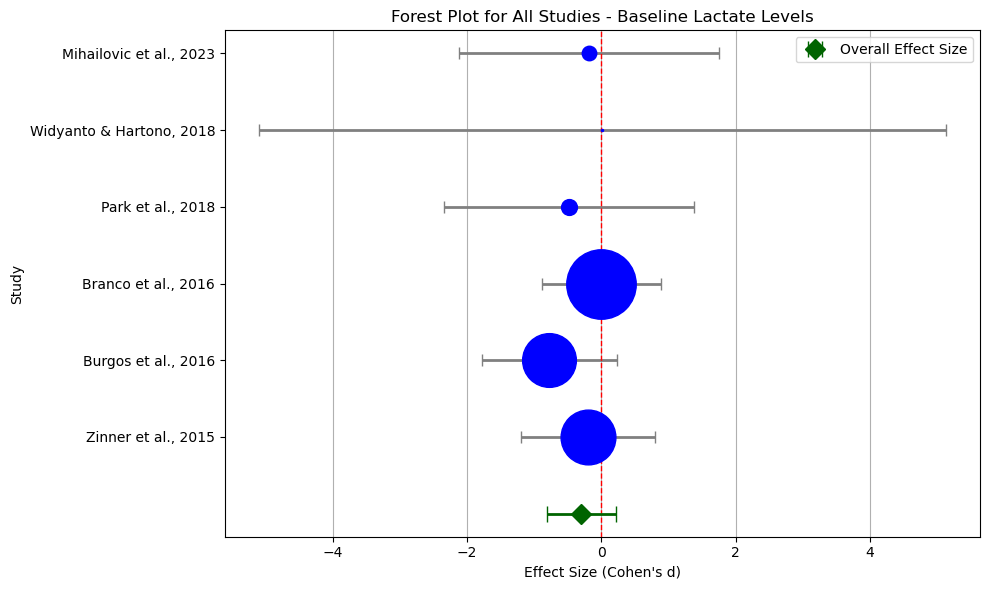


Effect Sizes and 95% Confidence Intervals for Baseline Lactate Levels:
Study                          Effect Size     95% CI              
Mihailovic et al., 2023        -0.19           [-2.13, 1.76]       
Widyanto & Hartono, 2018       0.02            [-5.10, 5.13]       
Park et al., 2018              -0.49           [-2.34, 1.37]       
Branco et al., 2016            0.00            [-0.89, 0.89]       
Burgos et al., 2016            -0.78           [-1.79, 0.23]       
Zinner et al., 2015            -0.20           [-1.20, 0.80]       

Overall Effect Size and 95% CI:
Overall: -0.30 [-0.81, 0.21]



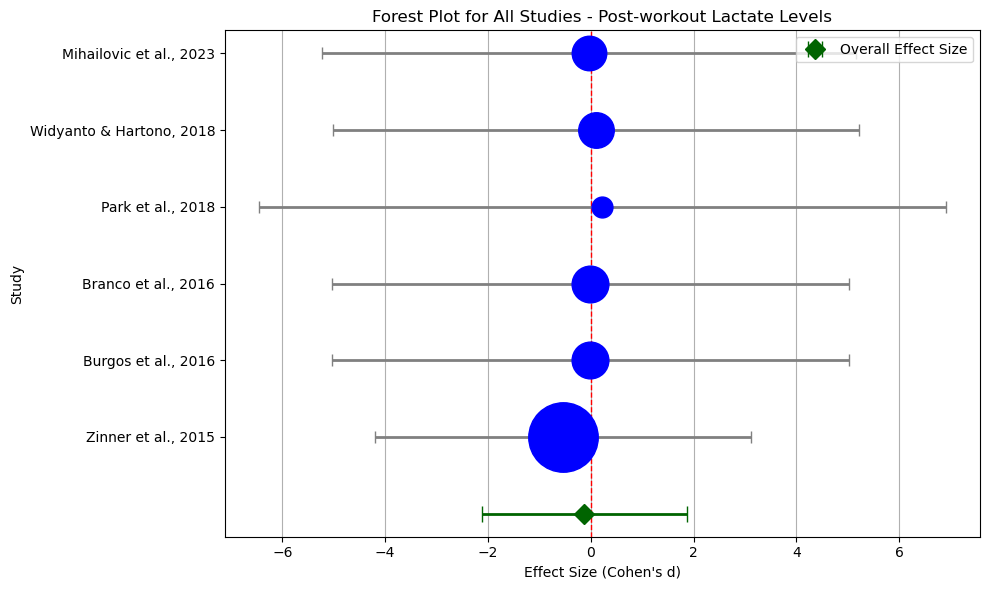


Effect Sizes and 95% Confidence Intervals for Post-workout Lactate Levels:
Study                          Effect Size     95% CI              
Mihailovic et al., 2023        -0.04           [-5.23, 5.15]       
Widyanto & Hartono, 2018       0.10            [-5.02, 5.22]       
Park et al., 2018              0.23            [-6.45, 6.90]       
Branco et al., 2016            -0.01           [-5.04, 5.02]       
Burgos et al., 2016            -0.01           [-5.04, 5.02]       
Zinner et al., 2015            -0.54           [-4.19, 3.12]       

Overall Effect Size and 95% CI:
Overall: -0.13 [-2.13, 1.86]



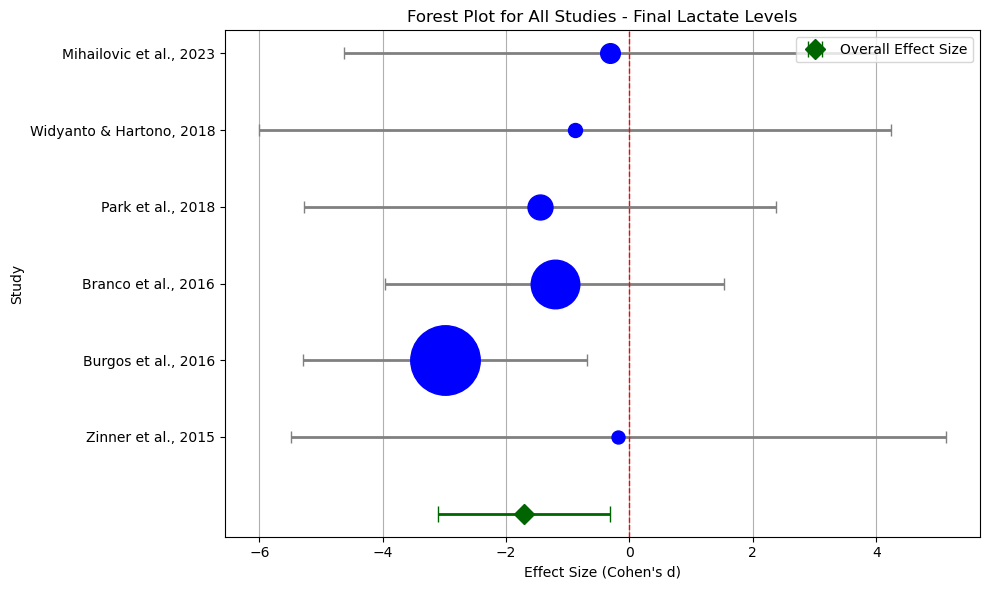


Effect Sizes and 95% Confidence Intervals for Final Lactate Levels:
Study                          Effect Size     95% CI              
Mihailovic et al., 2023        -0.32           [-4.63, 3.99]       
Widyanto & Hartono, 2018       -0.89           [-6.00, 4.23]       
Park et al., 2018              -1.45           [-5.28, 2.38]       
Branco et al., 2016            -1.21           [-3.96, 1.53]       
Burgos et al., 2016            -2.99           [-5.28, -0.70]      
Zinner et al., 2015            -0.18           [-5.49, 5.12]       

Overall Effect Size and 95% CI:
Overall: -1.71 [-3.10, -0.32]



In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

effect_sizes_all_baseline = data['cohen_d_baseline']
effect_sizes_all_postwork = data['cohen_d_postwork']
effect_sizes_all_final = data['cohen_d_final']

variances_all_baseline = (data['control_baseline_lactate_sd']**2 + data['HBOT_baseline_lactate_sd']**2) / 2
variances_all_postwork = (data['control_postwork_lactate_sd']**2 + data['HBOT_postwork_lactate_sd']**2) / 2
variances_all_final = (data['control_final_lactate_sd']**2 + data['HBOT_final_lactate_sd']**2) / 2

def general_forest_plot_with_table(effect_sizes, variances, time_point, study_names):
    studies = range(1, len(effect_sizes) + 1)
    lower_bounds = effect_sizes - 1.96 * np.sqrt(variances)
    upper_bounds = effect_sizes + 1.96 * np.sqrt(variances)

    weights = 1 / variances
    marker_sizes = (weights / max(weights)) * 50  

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, (effect, lower, upper, size) in enumerate(zip(effect_sizes, lower_bounds, upper_bounds, marker_sizes)):
        ax.errorbar(effect, i + 1, xerr=[[effect - lower], [upper - effect]], 
                    fmt='o', color='b', ecolor='gray', elinewidth=2, capsize=4, markersize=size)

    ax.axvline(0, linestyle='--', color='r', linewidth=1)

    ax.set_xlabel('Effect Size (Cohen\'s d)')
    ax.set_ylabel('Study')
    ax.set_title(f'Forest Plot for All Studies - {time_point.capitalize()} Lactate Levels')

    ax.set_yticks(studies)
    ax.set_yticklabels(study_names)
    ax.invert_yaxis()  

    overall_effect_size = np.average(effect_sizes, weights=weights)
    overall_se = np.sqrt(1 / np.sum(1 / variances))
    overall_lower = overall_effect_size - 1.96 * overall_se
    overall_upper = overall_effect_size + 1.96 * overall_se

    ax.errorbar(overall_effect_size, len(study_names) + 1, xerr=[[overall_effect_size - overall_lower], [overall_upper - overall_effect_size]], 
                fmt='D', color='darkgreen', ecolor='darkgreen', elinewidth=2, capsize=6, markersize=10, label='Overall Effect Size')

    ax.legend(loc='upper right')
    ax.grid(axis='x')

    plt.tight_layout()
    plt.show()

    table_data = []
    for i, (study, effect, lower, upper) in enumerate(zip(study_names, effect_sizes, lower_bounds, upper_bounds)):
        table_data.append([study, f"{effect:.2f}", f"[{lower:.2f}, {upper:.2f}]"])

    print(f"\nEffect Sizes and 95% Confidence Intervals for {time_point.capitalize()} Lactate Levels:")
    print("{:<30} {:<15} {:<20}".format("Study", "Effect Size", "95% CI"))
    print("="*70)
    for row in table_data:
        print("{:<30} {:<15} {:<20}".format(row[0], row[1], row[2]))

    overall_text = f"{overall_effect_size:.2f} [{overall_lower:.2f}, {overall_upper:.2f}]"
    print("\nOverall Effect Size and 95% CI:")
    print("="*70)
    print(f"Overall: {overall_text}\n")

study_names = data['Study']


general_forest_plot_with_table(effect_sizes_all_baseline, variances_all_baseline, 'baseline', study_names)

general_forest_plot_with_table(effect_sizes_all_postwork, variances_all_postwork, 'post-workout', study_names)

general_forest_plot_with_table(effect_sizes_all_final, variances_all_final, 'final', study_names)


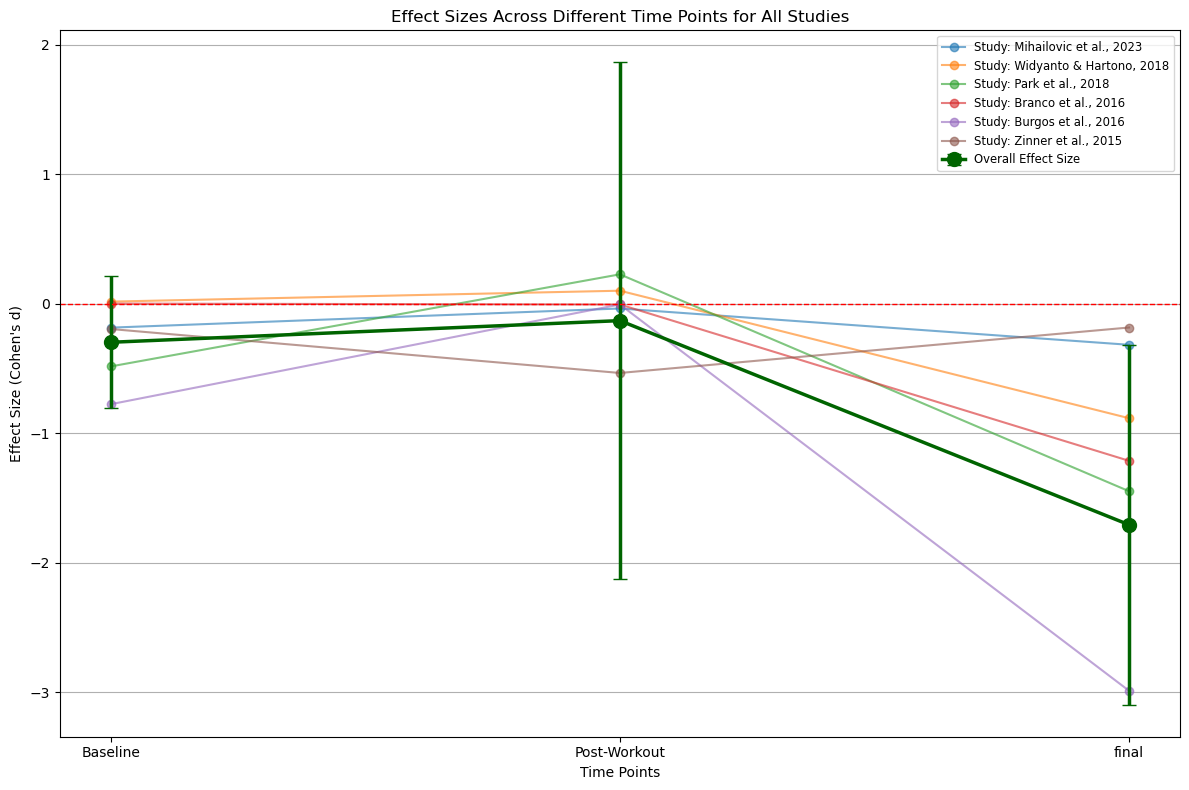

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


effect_sizes_all_baseline = data['cohen_d_baseline']
effect_sizes_all_postwork = data['cohen_d_postwork']
effect_sizes_all_final = data['cohen_d_final']

variances_all_baseline = (data['control_baseline_lactate_sd']**2 + data['HBOT_baseline_lactate_sd']**2) / 2
variances_all_postwork = (data['control_postwork_lactate_sd']**2 + data['HBOT_postwork_lactate_sd']**2) / 2
variances_all_final = (data['control_final_lactate_sd']**2 + data['HBOT_final_lactate_sd']**2) / 2

time_points = ['Baseline', 'Post-Workout', 'final']
effect_sizes = [effect_sizes_all_baseline, effect_sizes_all_postwork, effect_sizes_all_final]
variances = [variances_all_baseline, variances_all_postwork, variances_all_final]

overall_effect_sizes = []
overall_cis = []

for i in range(3):
    weights = 1 / variances[i]
    overall_effect = np.average(effect_sizes[i], weights=weights)
    overall_se = np.sqrt(1 / np.sum(weights))
    overall_lower = overall_effect - 1.96 * overall_se
    overall_upper = overall_effect + 1.96 * overall_se
    overall_effect_sizes.append(overall_effect)
    overall_cis.append((overall_lower, overall_upper))

plt.figure(figsize=(12, 8))

for idx, study in enumerate(data['Study']):
    study_effect_sizes = [effect_sizes_all_baseline[idx], effect_sizes_all_postwork[idx], effect_sizes_all_final[idx]]
    plt.plot(time_points, study_effect_sizes, marker='o', label=f'Study: {study}', alpha=0.6)

overall_effects = [overall_effect_sizes[0], overall_effect_sizes[1], overall_effect_sizes[2]]
overall_errors = [(overall_cis[i][1] - overall_cis[i][0]) / 2 for i in range(3)]

plt.errorbar(time_points, overall_effects, yerr=overall_errors, fmt='-o', color='darkgreen', linewidth=2.5, capsize=5, label='Overall Effect Size', markersize=10)

plt.xlabel('Time Points')
plt.ylabel('Effect Size (Cohen\'s d)')
plt.title('Effect Sizes Across Different Time Points for All Studies')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Reference line at 0 for no effect
plt.legend(loc='best', fontsize='small')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


In [40]:
import numpy as np
from scipy.stats import ttest_rel
from sklearn.impute import SimpleImputer
import pandas as pd

columns_of_interest = [
    'Study', 'n', 'n_intervention',  'intervention_pressure',
       'intervention_duration', 'intervention_sessions','intervention_Age', 'intervention_Age_sd',
    'intervention_Height', 'intervention_Height_sd', 'intervention_Weight', 'intervention_Weight_sd',
    'intervention_fatmass', 'intervention_fatmass_sd', 'n_control', 'control_Age', 'control_Age_sd',
    'control_Height', 'control_Height_sd', 'control_Weight', 'control_Weight_sd', 
    'control_fatmass', 'control_fatmass_sd', 'control_baseline_lactate', 
    'control_baseline_lactate_sd', 'control_postwork_lactate', 'control_postwork_lactate_sd', 
    'control_final_lactate', 'control_final_lactate_sd', 'HBOT_baseline_lactate', 
    'HBOT_baseline_lactate_sd', 'HBOT_postwork_lactate', 'HBOT_postwork_lactate_sd', 
    'HBOT_final_lactate', 'HBOT_final_lactate_sd', 'Units'
]

data = data[columns_of_interest]

imputer = SimpleImputer(strategy='mean')

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

def calculate_mean_difference(row, control_mean, hbot_mean):
    return row[hbot_mean] - row[control_mean]

data['baseline_diff'] = data.apply(lambda row: calculate_mean_difference(row, 'control_baseline_lactate', 'HBOT_baseline_lactate'), axis=1)
data['postwork_diff'] = data.apply(lambda row: calculate_mean_difference(row, 'control_postwork_lactate', 'HBOT_postwork_lactate'), axis=1)
data['final_diff'] = data.apply(lambda row: calculate_mean_difference(row, 'control_final_lactate', 'HBOT_final_lactate'), axis=1)

def calculate_cohen_d(row, control_mean, hbot_mean, control_sd, hbot_sd):
    pooled_sd = np.sqrt((row[control_sd]**2 + row[hbot_sd]**2) / 2)
    return (row[hbot_mean] - row[control_mean]) / pooled_sd

data['cohen_d_baseline'] = data.apply(lambda row: calculate_cohen_d(row, 'control_baseline_lactate', 'HBOT_baseline_lactate', 'control_baseline_lactate_sd', 'HBOT_baseline_lactate_sd'), axis=1)
data['cohen_d_postwork'] = data.apply(lambda row: calculate_cohen_d(row, 'control_postwork_lactate', 'HBOT_postwork_lactate', 'control_postwork_lactate_sd', 'HBOT_postwork_lactate_sd'), axis=1)
data['cohen_d_final'] = data.apply(lambda row: calculate_cohen_d(row, 'control_final_lactate', 'HBOT_final_lactate', 'control_final_lactate_sd', 'HBOT_final_lactate_sd'), axis=1)

print(data[['Study', 'baseline_diff', 'postwork_diff', 'final_diff', 'cohen_d_baseline', 'cohen_d_postwork', 'cohen_d_final']].tail())


                      Study  baseline_diff  postwork_diff  final_diff  \
1  Widyanto & Hartono, 2018           0.04         0.2600       -2.31   
2         Park et al., 2018          -0.46         0.7700       -2.83   
3       Branco et al., 2016           0.00        -0.0175       -1.70   
4       Burgos et al., 2016          -0.40        -0.0175       -3.50   
5       Zinner et al., 2015          -0.10        -1.0000       -0.50   

   cohen_d_baseline  cohen_d_postwork  cohen_d_final  
1          0.015326          0.099617      -0.885057  
2         -0.485247          0.226085      -1.449007  
3          0.000000         -0.006818      -1.214286  
4         -0.777029         -0.006818      -2.990252  
5         -0.196116         -0.535672      -0.184601  


In [41]:
data['intervention_Height_m'] = data['intervention_Height'] / 100
data['intervention_BMI'] = data['intervention_Weight'] / (data['intervention_Height_m'] ** 2)

median_bmi = data['intervention_BMI'].median()
data['bmi_group'] = data['intervention_BMI'].apply(lambda x: 'Low BMI' if x <= median_bmi else 'High BMI')

low_bmi_data = data[data['bmi_group'] == 'Low BMI']
high_bmi_data = data[data['bmi_group'] == 'High BMI']

def run_subgroup_meta_analysis(subgroup_data, time_point):
    effect_sizes = subgroup_data[f'cohen_d_{time_point}']
    variances = subgroup_data[f'var_{time_point}']
    return run_meta_analysis(effect_sizes, variances)

low_bmi_data['var_baseline'] = low_bmi_data.apply(lambda row: calculate_variance(row, 'control_baseline_lactate_sd', 'HBOT_baseline_lactate_sd'), axis=1)
low_bmi_data['var_postwork'] = low_bmi_data.apply(lambda row: calculate_variance(row, 'control_postwork_lactate_sd', 'HBOT_postwork_lactate_sd'), axis=1)
low_bmi_data['var_final'] = low_bmi_data.apply(lambda row: calculate_variance(row, 'control_final_lactate_sd', 'HBOT_final_lactate_sd'), axis=1)

high_bmi_data['var_baseline'] = high_bmi_data.apply(lambda row: calculate_variance(row, 'control_baseline_lactate_sd', 'HBOT_baseline_lactate_sd'), axis=1)
high_bmi_data['var_postwork'] = high_bmi_data.apply(lambda row: calculate_variance(row, 'control_postwork_lactate_sd', 'HBOT_postwork_lactate_sd'), axis=1)
high_bmi_data['var_final'] = high_bmi_data.apply(lambda row: calculate_variance(row, 'control_final_lactate_sd', 'HBOT_final_lactate_sd'), axis=1)

low_bmi_baseline_meta = run_subgroup_meta_analysis(low_bmi_data, 'baseline')
low_bmi_postwork_meta = run_subgroup_meta_analysis(low_bmi_data, 'postwork')
low_bmi_final_meta = run_subgroup_meta_analysis(low_bmi_data, 'final')

high_bmi_baseline_meta = run_subgroup_meta_analysis(high_bmi_data, 'baseline')
high_bmi_postwork_meta = run_subgroup_meta_analysis(high_bmi_data, 'postwork')
high_bmi_final_meta = run_subgroup_meta_analysis(high_bmi_data, 'final')

low_bmi_baseline_meta_summary = low_bmi_baseline_meta.summary()
low_bmi_postwork_meta_summary = low_bmi_postwork_meta.summary()
low_bmi_final_meta_summary = low_bmi_final_meta.summary()

high_bmi_baseline_meta_summary = high_bmi_baseline_meta.summary()
high_bmi_postwork_meta_summary = high_bmi_postwork_meta.summary()
high_bmi_final_meta_summary = high_bmi_final_meta.summary()

low_bmi_baseline_meta_summary, low_bmi_postwork_meta_summary, low_bmi_final_meta_summary, high_bmi_baseline_meta_summary, high_bmi_postwork_meta_summary, high_bmi_final_meta_summary


C:\Users\SBSBB\AppData\Local\Temp\ipykernel_40044\1309135638.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_bmi_data['var_baseline'] = low_bmi_data.apply(lambda row: calculate_variance(row, 'control_baseline_lactate_sd', 'HBOT_baseline_lactate_sd'), axis=1)
C:\Users\SBSBB\AppData\Local\Temp\ipykernel_40044\1309135638.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_bmi_data['var_postwork'] = low_bmi_data.apply(lambda row: calculate_variance(row, 'control_postwork_lactate_sd', 'HBOT_postwor

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             WLS Regression Results                            
 Dep. Variable:       cohen_d_baseline   R-squared:                       0.000
 Model:                            WLS   Adj. R-squared:                  0.000
 Method:                 Least Squares   F-statistic:                       nan
 Date:                Tue, 01 Oct 2024   Prob (F-statistic):                nan
 Time:                        21:13:55   Log-Likelihood:               -0.10291
 No. Observations:                   3   AIC:                             2.206
 Df Residuals:                       2   BIC:                             1.304
 Df Model:                           0                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [42]:
data.columns 

Index(['Study', 'n', 'n_intervention', 'intervention_pressure',
       'intervention_duration', 'intervention_sessions', 'intervention_Age',
       'intervention_Age_sd', 'intervention_Height', 'intervention_Height_sd',
       'intervention_Weight', 'intervention_Weight_sd', 'intervention_fatmass',
       'intervention_fatmass_sd', 'n_control', 'control_Age', 'control_Age_sd',
       'control_Height', 'control_Height_sd', 'control_Weight',
       'control_Weight_sd', 'control_fatmass', 'control_fatmass_sd',
       'control_baseline_lactate', 'control_baseline_lactate_sd',
       'control_postwork_lactate', 'control_postwork_lactate_sd',
       'control_final_lactate', 'control_final_lactate_sd',
       'HBOT_baseline_lactate', 'HBOT_baseline_lactate_sd',
       'HBOT_postwork_lactate', 'HBOT_postwork_lactate_sd',
       'HBOT_final_lactate', 'HBOT_final_lactate_sd', 'Units', 'baseline_diff',
       'postwork_diff', 'final_diff', 'cohen_d_baseline', 'cohen_d_postwork',
       'cohen_d_f

In [43]:
import statsmodels.formula.api as smf

regression_data = data[['cohen_d_baseline', 'cohen_d_postwork', 'cohen_d_final',
                        'intervention_pressure', 'intervention_duration', 'intervention_sessions']]



baseline_regression = smf.ols(formula='cohen_d_baseline ~ intervention_pressure + intervention_duration + intervention_sessions', data=regression_data).fit()

postwork_regression = smf.ols(formula='cohen_d_postwork ~ intervention_pressure + intervention_duration + intervention_sessions', data=regression_data).fit()

final_regression = smf.ols(formula='cohen_d_final ~ intervention_pressure + intervention_duration + intervention_sessions', data=regression_data).fit()

baseline_regression_summary = baseline_regression.summary()
postwork_regression_summary = postwork_regression.summary()
final_regression_summary = final_regression.summary()

baseline_regression_summary, postwork_regression_summary, final_regression_summary


c:\Users\SBSBB\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\SBSBB\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\SBSBB\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       cohen_d_baseline   R-squared:                       0.715
 Model:                            OLS   Adj. R-squared:                  0.289
 Method:                 Least Squares   F-statistic:                     1.676
 Date:                Tue, 01 Oct 2024   Prob (F-statistic):              0.395
 Time:                        21:13:55   Log-Likelihood:                 2.8951
 No. Observations:                   6   AIC:                             2.210
 Df Residuals:                       2   BIC:                             1.377
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------------------------------------

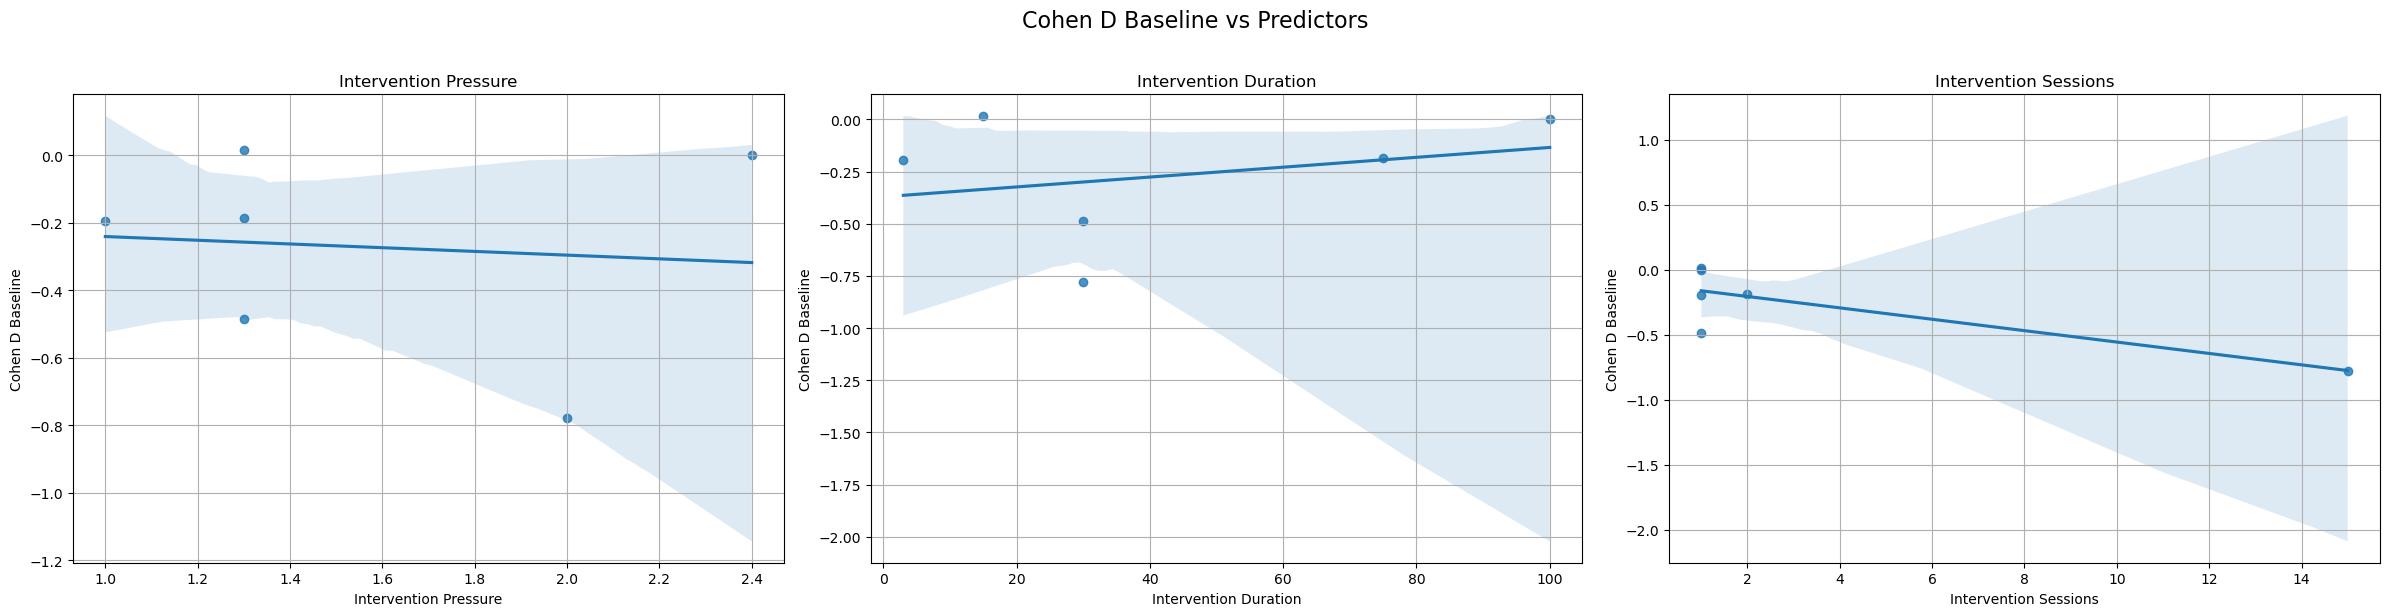

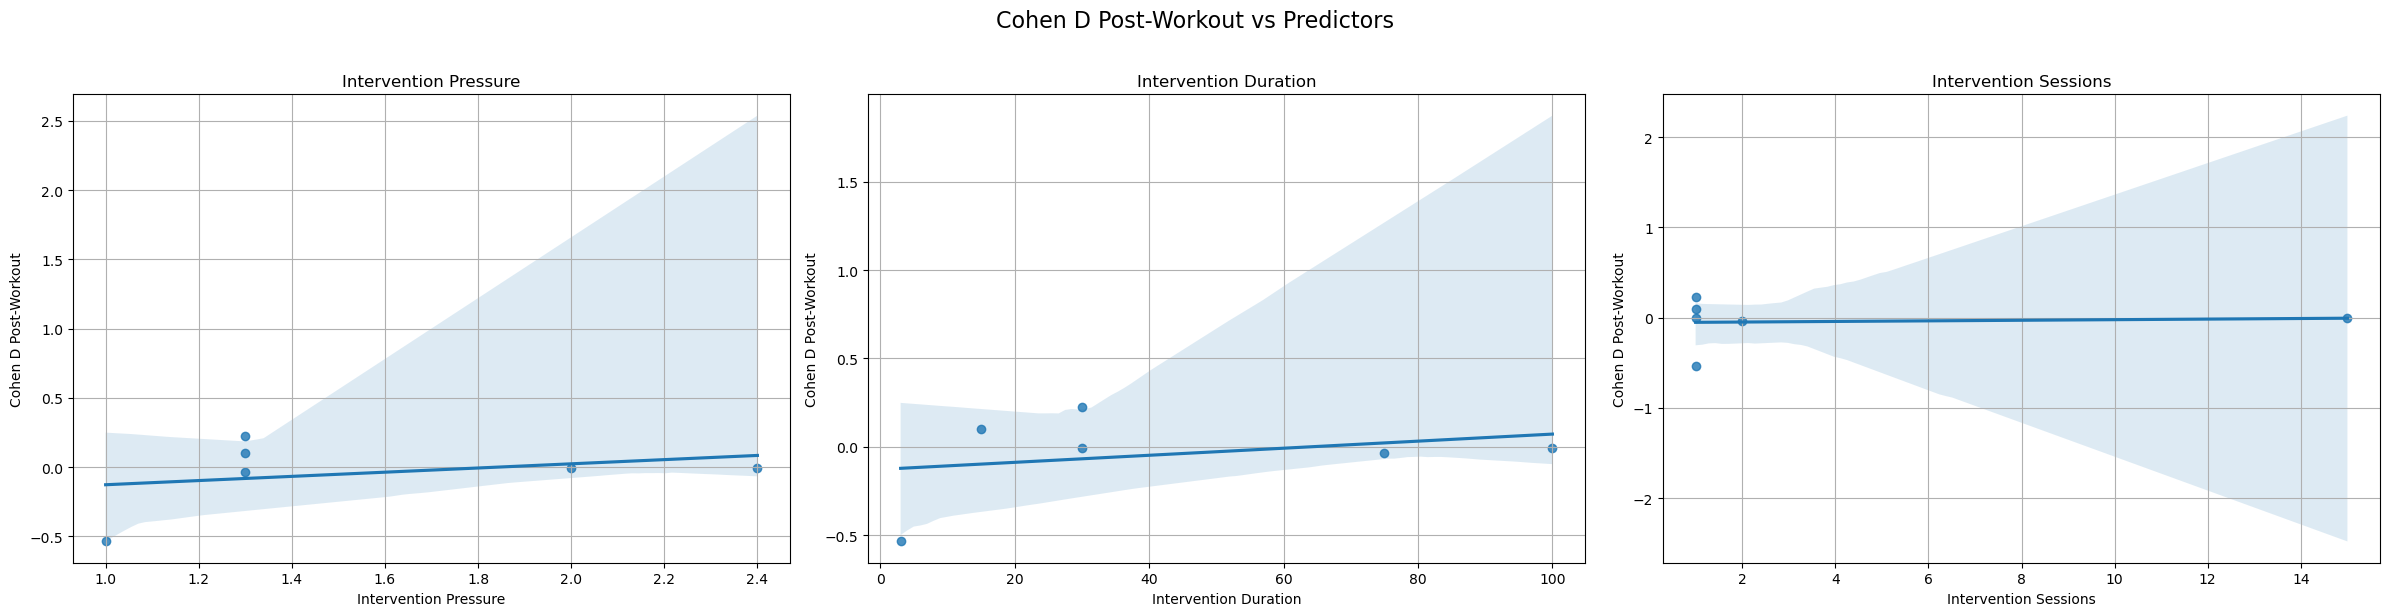

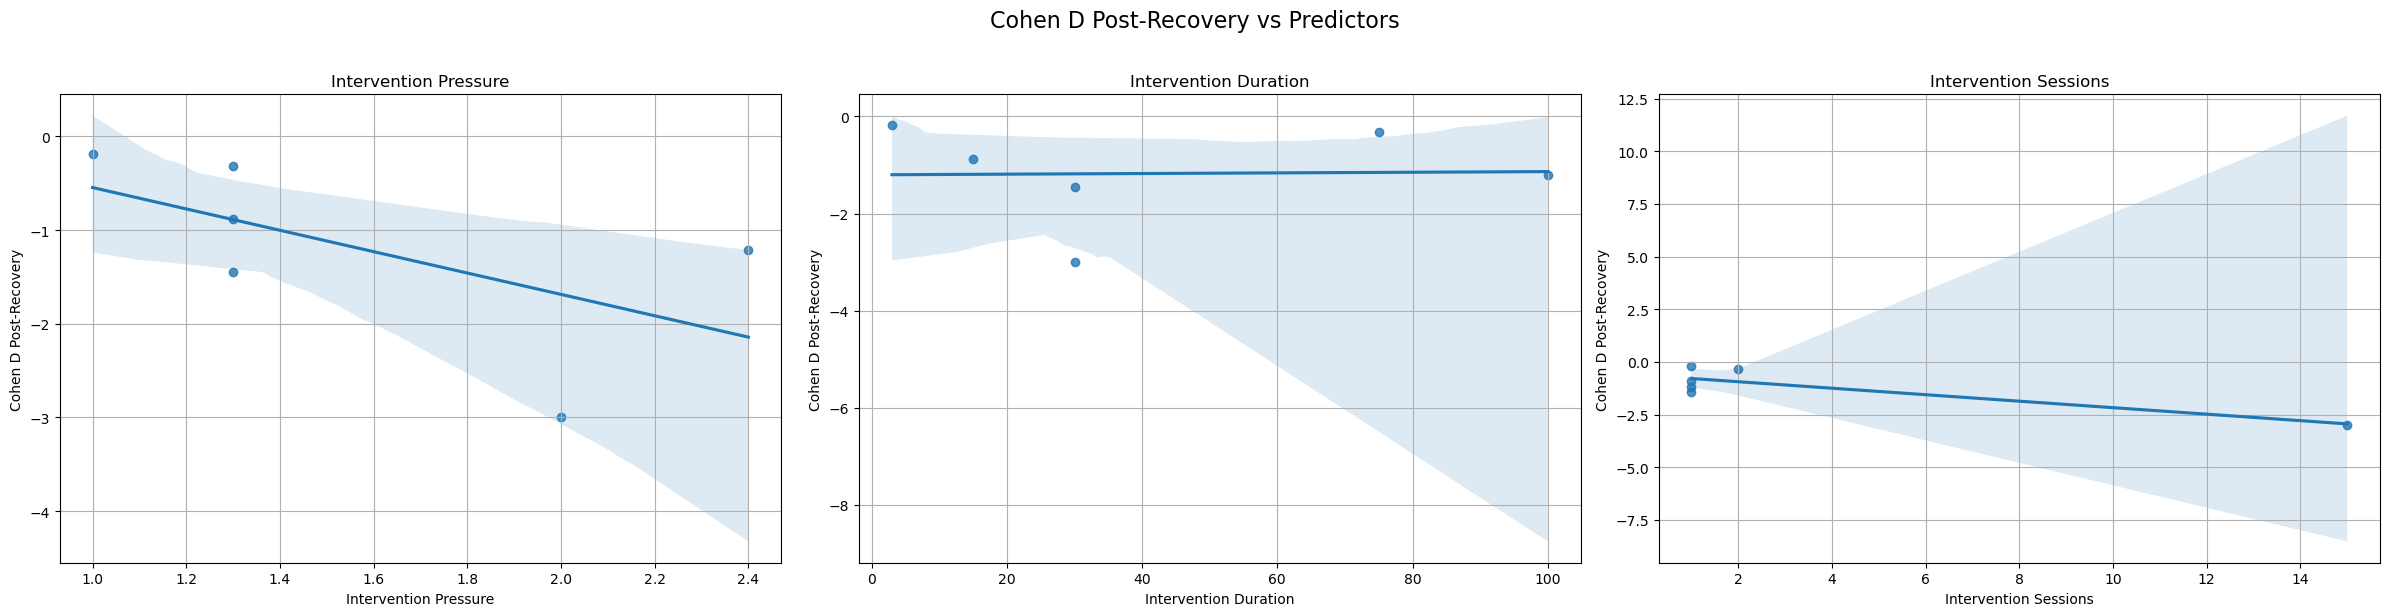

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_regression_relationships(data, dependent_vars, predictors):
    for dependent_var in dependent_vars:
        fig, axes = plt.subplots(1, 3, figsize=(24, 6))  # Sets of three charts side by side

        custom_titles = {
            'cohen_d_baseline': 'Cohen D Baseline',
            'cohen_d_postwork': 'Cohen D Post-Workout',
            'cohen_d_final': 'Cohen D Post-Recovery'
        }
        overall_title = custom_titles.get(dependent_var, dependent_var.replace('_', ' ').title())

        for i, predictor in enumerate(predictors):
            sns.regplot(ax=axes[i], x=predictor, y=dependent_var, data=data)
            axes[i].set_xlabel(predictor.replace('_', ' ').title())
            axes[i].set_ylabel(overall_title)
            axes[i].set_title(f'{predictor.replace("_", " ").title()}')
            axes[i].grid(True)

        fig.suptitle(f'{overall_title} vs Predictors', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()

predictors = ['intervention_pressure', 'intervention_duration', 'intervention_sessions']
dependent_vars = ['cohen_d_baseline', 'cohen_d_postwork', 'cohen_d_final']


visualize_regression_relationships(regression_data, dependent_vars, predictors)
